In [1]:
from sympy import symbols, pi, log
from sympy.solvers import solve

from sympy import init_printing
from IPython.display import Latex
init_printing()

In [2]:
kB = 8.617333e-2 # meV/K

In [3]:
T_N, J_tilde, J_c = symbols(r'T_N \tilde{J} J_c')

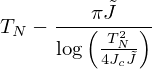

In [4]:
expr = T_N - pi * J_tilde / log(T_N**2 / (4*J_tilde *J_c))
expr

Solve what $J_c$ is required to reproduce experimental $T_N$

In [5]:
sol = solve(expr, J_c)[0]
T_N_experiment = 240 * kB # in meV
J_c_val = sol.subs([(J_tilde, 60.), (T_N, T_N_experiment)]).evalf()
Latex(r'$J_c = {:.2f}$ $\mu$eV'.format(J_c_val*1e3))

<IPython.core.display.Latex object>

Predict $T_N$ based on $J_p = 15.86 \mu$eV

In [6]:
sol = solve(expr, T_N)[0]
T_N_prediction = sol.subs([(J_tilde, 60.), (J_c, 16e-3)]).evalf()
Latex(r'$T_N = {:.1f}$ K'.format(T_N_prediction/kB))

<IPython.core.display.Latex object>